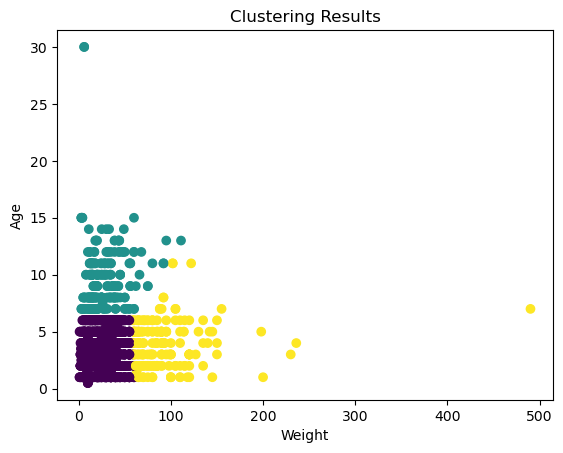

                         Breed  Age                  Preferred Foods  Weight  \
0                    Stray Dog  5.0        Meat, sausages with rice     25.0   
1010            Cocker Spaniel  2.0               Turkey, oats, peas    20.0   
1009                 Chow Chow  5.0  Salmon, wheat berries, eggplant    35.0   
1008           Chinese Crested  4.0            Beef, barley, carrots     8.0   
1007  Chesapeake Bay Retriever  3.0          Chicken, lentils, beets    45.0   
...                        ...  ...                              ...     ...   
548                Bullmastiff  1.0      Lamb, Amaranth, Green Beans   100.0   
541       Bouvier des Flandres  6.0        Duck, Wheat Berries, Peas    70.0   
539                     Borzoi  4.0             Pork, Kamut, Carrots    70.0   
1738                Weimaraner  5.0      elk, millet, sweet potatoes    86.0   
620                    Mastiff  1.0  Chicken, Couscous, Cauliflower    200.0   

      Breed_ Cocker Spaniel  Breed_ Cor

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('FoodsNew.csv')

# Specify the columns you want to keep
wanted_columns = ['Breed', 'Age', 'Preferred Foods', 'Weight']

# Drop unwanted columns
df = df[wanted_columns]

# One-hot encode categorical columns
ohe = OneHotEncoder()

# Transform and append one-hot encoded features to the DataFrame
encoded_features = ohe.fit_transform(df[['Breed', 'Preferred Foods']]).toarray()
encoded_feature_labels = ohe.get_feature_names_out(['Breed', 'Preferred Foods'])
df_encoded = pd.concat([df, pd.DataFrame(encoded_features, columns=encoded_feature_labels)], axis=1)

# Extract only 'Weight' and 'Age' columns for clustering
numerical_features = df_encoded[['Weight', 'Age']]

# Fill NaN values with the mean of each column
numerical_features = numerical_features.fillna(numerical_features.mean())

# Normalize numerical features
scaler = StandardScaler()
numerical_features_normalized = scaler.fit_transform(numerical_features)

# Specify the number of clusters (you may need to choose an appropriate value)
num_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df_encoded['Cluster'] = kmeans.fit_predict(numerical_features_normalized)

# Visualize the clusters
plt.scatter(df_encoded['Weight'], df_encoded['Age'], c=df_encoded['Cluster'], cmap='viridis')
plt.xlabel('Weight')
plt.ylabel('Age')
plt.title('Clustering Results')
plt.show()

# Sort the DataFrame based on a specific column (e.g., 'Cluster')
df_encoded_sorted = df_encoded.sort_values(by='Cluster')

# Print the sorted DataFrame
print(df_encoded_sorted)
df_encoded_sorted.to_csv('Clustered.csv', index=False)

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Read the CSV file into a DataFrame
df = pd.read_csv('Clustered.csv')

# Drop the 'breed' and 'preferred_food' columns
df = df.drop(['Breed', 'Preferred Foods'], axis=1)

# Print the modified DataFrame
print(df)

# Export the modified DataFrame to a new CSV file
df.to_csv('Clustered_Final.csv', index=False)

      Age  Weight  Breed_ Cocker Spaniel  Breed_ Corgi  Breed_ Dachshund  \
0     5.0    25.0                    0.0           0.0               0.0   
1     2.0    20.0                    0.0           0.0               0.0   
2     5.0    35.0                    0.0           0.0               0.0   
3     4.0     8.0                    0.0           0.0               0.0   
4     3.0    45.0                    0.0           0.0               0.0   
...   ...     ...                    ...           ...               ...   
1735  1.0   100.0                    0.0           0.0               0.0   
1736  6.0    70.0                    0.0           0.0               0.0   
1737  4.0    70.0                    0.0           0.0               0.0   
1738  5.0    86.0                    0.0           0.0               0.0   
1739  1.0   200.0                    0.0           0.0               0.0   

      Breed_ Labrador  Breed_ Labrador   Breed_ Rottweiler  Breed_ Stray Dog  \
0      

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Read the CSV file into a DataFrame
df = pd.read_csv('Clustered_Final.csv')
# Assuming 'weight', 'age', and 'Breed' are your feature columns
# Adjust column names based on your specific dataset
feature_columns = df.columns[df.columns.str.startswith('Breed_')].tolist() + ['Weight', 'Age']

# Adjust column names based on your specific dataset
target_column = df.columns[df.columns.str.startswith('Preferred Foods_')].tolist()
x_train, x_test, y_train, y_test = train_test_split(df[feature_columns], df[target_column], test_size=0.2, random_state=15)

clf = DecisionTreeClassifier().fit(x_train, y_train)

y_pred = clf.predict(x_test)
# print("Predictions (Binary):", y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Assume user_inputs is a dictionary containing input values for breed, age, and weight
user_inputs = {'Breed_A': 1, 'Breed_B': 0, 'Weight': 21, 'Age': 5}

# Create a DataFrame with the user's input
user_df = pd.DataFrame([user_inputs])

# Ensure column order and structure matches the training data
user_df = user_df.reindex(columns=feature_columns, fill_value=0)

# Use the trained model to predict preferred foods
user_pred = clf.predict(user_df)

# Display or use the prediction
# print("Predicted Preferred Foods:", user_pred)

# Assuming you have a list of food category names in the same order as the columns in y_pred
food_category_names = df.columns[df.columns.str.startswith('Preferred Foods_')].tolist()

# Map binary predictions to words
predicted_category_index = user_pred.argmax(axis=1)
predicted_category = food_category_names[predicted_category_index[0]]

# Remove the "Preferred Foods_" part
predicted_category = predicted_category.replace('Preferred Foods_', '')

# Display the predicted category
print("Predicted Preferred Foods:", predicted_category)

Accuracy: 34.20%
Predicted Preferred Foods: Salmon, wheat berries, eggplant


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Read the CSV file into a DataFrame
df = pd.read_csv('Final.csv')

# Assuming 'Weight', 'Age', and the 'Breed_' columns are your feature columns
# Adjust column names based on your specific dataset
feature_columns = ['Weight', 'Age'] + df.columns[df.columns.str.startswith('Breed_')].tolist()

# Assuming 'Preferred Foods_' columns are your target columns
# Adjust column names based on your specific dataset
target_columns = df.columns[df.columns.str.startswith('Preferred Foods_')].tolist()

x_train, x_test, y_train, y_test = train_test_split(df[feature_columns], df[target_columns], test_size=0.2, random_state=15)

y_pred = clf.predict(x_test)
# print("Predictions (Binary):", y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

clf = DecisionTreeClassifier().fit(x_train, y_train)

# Get user inputs
user_age = float(input("Enter the age: "))
user_weight = float(input("Enter the weight: "))
user_breed = input("Enter the breed (e.g., 'Cocker Spaniel', 'Labrador', etc.): ")

# Create a DataFrame with the user's input
user_input = pd.DataFrame({'Weight': [user_weight], 'Age': [user_age]})
# Add a column for the specified breed
user_input['Breed_' + user_breed] = 1

# Ensure column order and structure matches the training data
user_df = user_input.reindex(columns=feature_columns, fill_value=0)

# Use the trained model to predict preferred foods
user_pred = clf.predict(user_df)

# Display or use the prediction
food_category_names = df.columns[df.columns.str.startswith('Preferred Foods_')].tolist()
predicted_category_index = user_pred.argmax(axis=1)
predicted_category = food_category_names[predicted_category_index[0]]
predicted_category = predicted_category.replace('Preferred Foods_', '')

# Display the predicted category
print("Predicted Preferred Foods:", predicted_category)


Accuracy: 33.33%
Enter the age: 2.5
Enter the weight: 25
Enter the breed (e.g., 'Cocker Spaniel', 'Labrador', etc.): Labrador
Predicted Preferred Foods: Chicken, Rice, Carrots
